<a href="https://colab.research.google.com/github/samuel-mati/Introduction-to-Pytorch/blob/main/Introduction_to_Pytorch_Part_2__simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BULDING A BASIC NEURAL NETWORK**
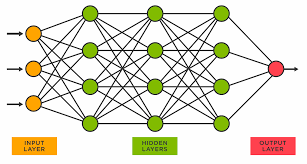

In [133]:

import torch
import torch.nn as nn
import torch.nn.functional as F

In [134]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  #input layer(4 features of the flower)-->
  # Hidden Layer 1 (number of neuron) -->
  # Hidden layer 2-->
  # Output

  def __init__(self, in_features=4, h1=8,h2=9, output_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,output_features)

  def foward(self,X):
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.out(X)

    return X



**Explanation:**

`class Model(nn.Module)`:: This line defines a class named Model that inherits from nn.Module. This is the standard way to create a neural network model in PyTorch. nn.Module provides a lot of useful functionalities for building and training neural networks.

`def __init__(self, in_features=4, h1=8,h2=9, output_features=3):`: This is the constructor of the Model class. It initializes the layers of the neural network.

`in_features=4:` This specifies the number of input features (4 in this case,  representing 4 features of a flower).
`h1=8:` This sets the number of neurons in the first hidden layer to 8.
`h2=9`: This sets the number of neurons in the second hidden layer to 9.

`output_features=3: `This specifies the number of output features (3 in this case, representing 3 different species of flowers).

`self.fc1=nn.Linear(in_features,h1)`: This creates a fully connected (linear) layer named fc1 that connects the input layer to the first hidden layer.

`self.fc2=nn.Linear(h1,h2):` This creates a fully connected layer named fc2 that connects the first hidden layer to the second hidden layer.

`self.out=nn.Linear(h2,output_features):` This creates a fully connected layer named out that connects the second hidden layer to the output layer.

`def foward(self,X)`: This method defines the forward pass of the neural network, which is how input data flows through the network to produce the output.

`X=F.relu(self.fc1(X))`: This line applies the relu activation function to the output of the first fully connected layer (fc1). ReLU (Rectified Linear Unit) is a common activation function that introduces non-linearity into the network.

`X=F.relu(self.fc2(X))`: This line applies the relu activation function to the output of the second fully connected layer (fc2).

`X=self.out(X):` This line passes the output of the second hidden layer through the output layer (out) to produce the final output.
return X: This line returns the final output of the network.

In summary, the code defines a neural network with two hidden layers and uses the ReLU activation function. It is designed to take an input with 4 features, process it through the layers, and produce an output with 3 features. This type of network is often used for classification tasks, such as classifying flowers based on their features.

In [135]:
# Pick a manual Seed for Randomization

torch.manual_seed(30)

# Create an Instance of the Model
model=Model()

## **LOAD DATA AND TRAIN THE MODEL**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [137]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df=pd.read_csv(url)

In [138]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [139]:
# Change last column to floats
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)

<ipython-input-139-cc2be79ddaba>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety']=df['variety'].replace('Virginica',2.0)


In [140]:
df['variety'].unique()

array([0., 1., 2.])

In [141]:
#Train, Test Split!! Set X,y

X=df.drop('variety',axis=1)
y=df['variety']

In [142]:
X=X.values
y=y.values

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
#Train Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=30)

In [145]:
# Convert X featuers to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)


In [146]:
# Convert y labels to long tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [147]:
# Set the criterion to measure the error

criterion=nn.CrossEntropyLoss()

# Choose an Adam Optimizer, learning rate(if error does not go down after a bunch of iterations(epochs) we, lower our learning rate)

optimizer=torch.optim.Adam(model.parameters(),lr=0.01)



In [148]:
#Train our Model
# Epochs? (one run through all the training data)
epochs=100

losses=[]

for i in range(epochs):
  #Go forward and get a predictions
  y_pred=model.foward(X_train) # Get predicted results

  # Measure the loss/error
  loss=criterion(y_pred, y_train) # predicted value vs y_train
  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10==0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do back propagation-->Error rate of foward propagation and feed back through the
  # network to fine tune the wights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1693464517593384
Epoch: 10 and loss: 1.0425225496292114
Epoch: 20 and loss: 0.9181672930717468
Epoch: 30 and loss: 0.647976815700531
Epoch: 40 and loss: 0.45246782898902893
Epoch: 50 and loss: 0.30702248215675354
Epoch: 60 and loss: 0.17922578752040863
Epoch: 70 and loss: 0.10770022124052048
Epoch: 80 and loss: 0.0759068951010704
Epoch: 90 and loss: 0.06145031750202179


Text(0.5, 0, 'Epoch')

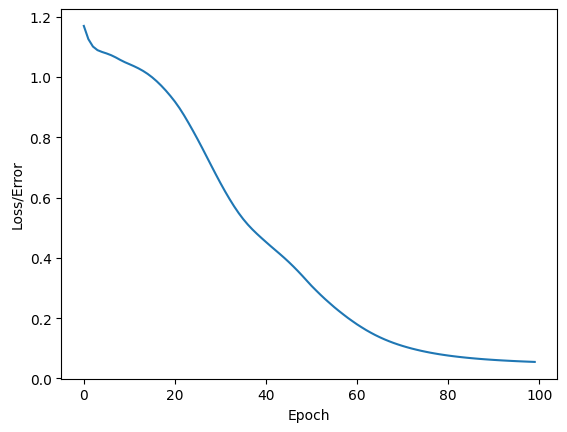

In [149]:
#Graph it out

plt.plot(range(epochs),losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [150]:
# Evaluate Modelon Test Data

with torch.no_grad():
  y_eval=model.foward(X_test)
  loss=criterion(y_eval, y_test) # find the  loss/error

In [151]:
loss

tensor(0.0858)

In [152]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.foward(data)

    # tell what type of flower the model thinks it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax()}")

    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'We got {correct} correct out of {len(y_test)}')
print(f'Accuracy: {100*correct/len(y_test)}% ')




1.) tensor([ 17.3322,  11.4964, -14.5622]) 	 0 	 0
2.) tensor([ 17.7481,  11.9074, -14.8118]) 	 0 	 0
3.) tensor([ 15.4589,  10.2350, -13.0282]) 	 0 	 0
4.) tensor([-7.1832,  4.6249, 10.0390]) 	 2 	 2
5.) tensor([2.5875, 8.0153, 0.4037]) 	 1 	 1
6.) tensor([2.0078, 7.4144, 0.7636]) 	 1 	 1
7.) tensor([-4.2486,  6.0439,  7.3626]) 	 2 	 2
8.) tensor([-6.4982,  5.7554,  9.8881]) 	 2 	 2
9.) tensor([2.2155, 8.4658, 1.0533]) 	 1 	 1
10.) tensor([-8.0804,  5.5843, 11.4690]) 	 2 	 2
11.) tensor([ 15.3080,  10.0152, -12.8555]) 	 0 	 0
12.) tensor([-7.2991,  5.0731, 10.3454]) 	 2 	 2
13.) tensor([ 3.4266,  7.4623, -0.8395]) 	 1 	 1
14.) tensor([1.0260, 7.4454, 1.9227]) 	 1 	 1
15.) tensor([ 14.8656,   9.8297, -12.5227]) 	 0 	 0
16.) tensor([1.6583, 8.1124, 1.5170]) 	 1 	 1
17.) tensor([ 18.9748,  12.1829, -15.8521]) 	 0 	 0
18.) tensor([ 16.1992,  10.6177, -13.6124]) 	 0 	 0
19.) tensor([ 15.1557,  10.5172, -12.6210]) 	 0 	 0
20.) tensor([-3.1993,  6.2897,  6.2220]) 	 1 	 1
21.) tensor([-3.4430

## **EVALUATE NEW DATA ON THE NETWORK**

In [153]:
new_iris=torch.tensor([4.7,2.2,1.3,0.2])

In [154]:
with torch.no_grad():
  print(model.foward(new_iris))

tensor([ 14.4468,   9.5762, -12.1783])


In [155]:
new_iris=torch.tensor([6.5,3.0,5.2,2.3])

In [156]:
with torch.no_grad():
  print(model.foward(new_iris))

tensor([-7.0554,  5.4021, 10.3518])


##**SAVE AND LOAD OUR MODEL**



In [157]:
# Save NN Model

torch.save(model.state_dict(),'my_awesome_iris_model.pt')

In [158]:
# Load our saved model
new_model=Model()
new_model.load_state_dict(torch.load('my_awesome_iris_model.pt'))

<ipython-input-158-c6f02ad2c414>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_awesome_iris_model.pt'))


<All keys matched successfully>

In [159]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [161]:
new_iris = torch.tensor([4.7, 2.2, 1.3, 0.2])  # Input for the new sample
new_iris = new_iris.float()  # Ensure the data type is compatible

# Predict the class for the new iris sample
with torch.no_grad():
    prediction = model.foward(new_iris)  # Get model output
    predicted_class = prediction.argmax().item()  # Get the index of the max value (predicted class)
    print(f"Predicted class for new iris sample: {predicted_class}")


Predicted class for new iris sample: 0
